In [1]:
import wfdb
import pywt
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import random
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import Xception, DenseNet121, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers, regularizers

In [ ]:
def generate_scalogram(signal, filename):
    scales = np.arange(1, 128)
    coef, _ = pywt.cwt(signal, scales, 'morl')
    plt.imshow(coef, cmap='jet', aspect='auto')
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

train_gen = datagen.flow_from_directory(
    './cwt_images',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for 3+ classes
    subset='training'
)

val_gen = datagen.flow_from_directory(
    './cwt_images',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 5200 images belonging to 5 classes.
Found 1300 images belonging to 5 classes.


In [3]:
model1 = Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
model1.trainable = False

model2 = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
model2.trainable = False

model3 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
model3.trainable = False

In [ ]:
x = model1.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
output = Dense(5, activation='softmax')(x) 

model1 = Model(inputs=model1.input, outputs=output)
model1.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x = model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
output = Dense(5, activation='softmax')(x) 

model2 = Model(inputs=model2.input, outputs=output)
model2.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
x = model3.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
output = Dense(5, activation='softmax')(x) 

model3 = Model(inputs=model3.input, outputs=output)
model3.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history1 = model1.fit(train_gen, validation_data=val_gen, epochs=10)
model.save('ecg_model_xception_epochs-10.h5')

In [ ]:
model1.save('ecg_model_xception_epochs-10.h5')

In [ ]:
loss, accuracy = model1.evaluate(val_gen)
print(f"Test Accuracy: {accuracy*100:.2f}%")

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history1.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train Loss', marker='o')
plt.plot(history1.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
history2 = model2.fit(train_gen, validation_data=val_gen, epochs=10)
model2.save('ecg_model_DenseNet121_epochs-10.h5')

In [ ]:
loss, accuracy = model2.evaluate(val_gen)
print(f"Test Accuracy: {accuracy*100:.2f}%")

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history2.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss', marker='o')
plt.plot(history2.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [5]:
history3 = model3.fit(train_gen, validation_data=val_gen, epochs=10)
model3.save('ecg_model_efficientnet_epochs-10.h5')

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.2251 - loss: 1.5701 - val_accuracy: 0.2685 - val_loss: 1.5476
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.2604 - loss: 1.5469 - val_accuracy: 0.2308 - val_loss: 1.5440
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 150s 923ms/step - accuracy: 0.2785 - loss: 1.5456 - val_accuracy: 0.2308 - val_loss: 1.5438
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.2729 - loss: 1.5375 - val_accuracy: 0.2731 - val_loss: 1.5401
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.2677 - loss: 1.5348 - val_accuracy: 0.4223 - val_loss: 1.5336
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.2917 - loss: 1.5348 - val_accuracy: 0.3362 - val_loss: 1.5292
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 108s 664ms/step - accuracy: 0.3094 - loss: 1.5327 - val_accuracy: 0.4331 - val_loss: 1.5238
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.3333 - loss: 1.5251 - va

In [6]:
loss, accuracy = model3.evaluate(val_gen)
print(f"Test Accuracy: {accuracy*100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 350ms/step - accuracy: 0.4209 - loss: 1.5122
Test Accuracy: 42.08%


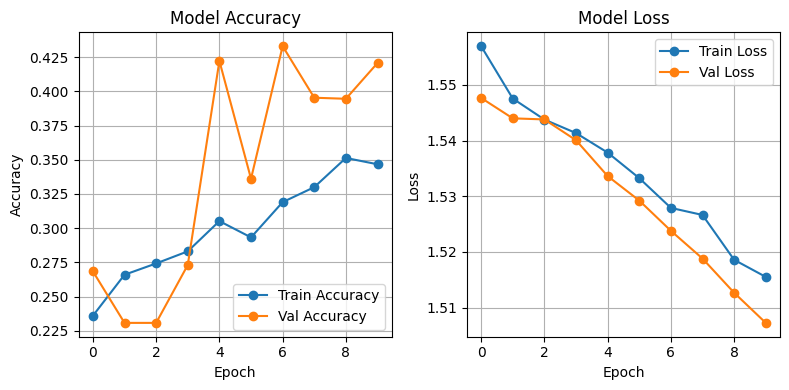

In [7]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history3.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Train Loss', marker='o')
plt.plot(history3.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def load_user_signal(folder_path, record_name='sample'):
    record = wfdb.rdrecord(f"{folder_path}/{record_name}")
    signal = record.p_signal[:, 0]  # First lead
    fs = record.fs
    return signal[:2*fs], fs  # First 2 seconds

In [ ]:
print(train_gen.class_indices)

In [ ]:
def predict_heart_condition(model_path, img_path):
    model = load_model(model_path)
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    predicted_class = np.argmax(prediction)
    class_labels = ['arrhythmia','artial','malignant', 'normal', 'st-change']
    return class_labels[predicted_class]

In [ ]:
signal, fs = load_user_signal('./user/normal','./16786')  # Assuming user_ecg.dat/.hea exists
generate_scalogram(signal, 'user_scalogram.png')
result = predict_heart_condition('ecg_model_resnet101_epochs-10.h5', 'user_scalogram.png')
print("Prediction:", result)

In [ ]:
def complete_pipeline_1(folder_path,record_name,output_path,model_path):
    signal, fs = load_user_signal(folder_path,record_name)
    generate_scalogram(signal,output_path)
    result = predict_heart_condition(model_path,output_path)
    print("Prediction:", result)

In [ ]:
def complete_pipeline(folder_path, record_name, true_label):
    signal, fs = load_user_signal(folder_path, record_name)
    generate_scalogram(signal, 'user_scalogram.png')
    predicted_label = predict_heart_condition('ecg_model_resnet101_epochs-10.h5', 'user_scalogram.png')

    # Plot signal with predicted and true label in title
    time = np.linspace(0, 2, len(signal))  # 2 seconds
    plt.figure(figsize=(10, 4))
    plt.plot(time, signal, color='black')
    plt.title(f"Predicted: {predicted_label} | True: {true_label}", fontsize=14)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("Prediction:", predicted_label)

In [ ]:
complete_pipeline('./user/normal','16786',true_label='Normal')

In [ ]:
complete_pipeline('./user/arrhy','215',true_label='Arrhythmia')

In [ ]:
complete_pipeline('./user/arrhy','228',true_label='Arrhythmia')

In [ ]:
complete_pipeline('./user/normal','19140',true_label='Normal')

In [ ]:
complete_pipeline('./user/normal','16273',true_label='Normal')

In [ ]:
complete_pipeline('./user/malignant/','418',true_label='malignant')

In [ ]:
complete_pipeline('./user/st/','313',true_label='st-change')

In [ ]:
complete_pipeline('./user/st/','314',true_label='st-change')

In [ ]:
complete_pipeline('./user/st/','321',true_label='st-change')

In [ ]:
complete_pipeline('./user/st/','322',true_label='st-change')

In [ ]:
complete_pipeline('./user/malignant/','429',true_label='malignant')

In [ ]:
complete_pipeline('./user/malignant/','430',true_label='malignant')

In [ ]:
complete_pipeline('./user/artial/','04015',true_label='artial')

In [ ]:
complete_pipeline('./user/artial/','04043',true_label='artial')

In [ ]:
complete_pipeline('./user/artial/','04936',true_label='artial')

In [ ]:
complete_pipeline('./user/artial/','05091',true_label='artial')

In [ ]:
complete_pipeline('./user/arrhy/','220',true_label='arrhythmia')

In [ ]:
complete_pipeline('./user/arrhy/','215',true_label='arrhythmia')

In [ ]:
complete_pipeline('./user/arrhy/','228',true_label='arrhythmia')

In [ ]:
complete_pipeline('./user/arrhy/','219',true_label='arrhythmia')

In [ ]:
complete_pipeline('./user/arrhy/','203',true_label='arrhythmia')